In [1]:
import numpy as np
from numpy import pi, sqrt, exp, sin, cos
import scipy.optimize
from qutip import *
import matplotlib.pyplot as plt
from core.dm_parametrization import *

[[1.+0.j 2.+3.j]
 [2.-3.j 4.+0.j]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.2786762  -0.16546241  0.05649008 -0.09473841]
 [-0.16546241  0.30368358 -0.05197053  0.00086599]
 [ 0.05649008 -0.05197053  0.11786216 -0.03054097]
 [-0.09473841  0.00086599 -0.03054097  0.29977806]]
0.9999999999999998 True


/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  V[0:j - 1, 0:j - 1] = W
/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  V[0:j - 1, j - 1] = s * z_u.trans()
/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  V[j - 1, 0:j - 1] = -s * z_u.conj().trans()


In [2]:
v = basis(4,0)


# A = basis(2,0)*basis(2,0).dag()
# 
# A_v = operator_to_vector(A)
# 
# print(A_v)

In [3]:
U_AE = get_unitary(np.random.uniform(-100, 100, size=16), n=4)

U_AE = Qobj(U_AE, dims=[[2,2],[2,2]])

rho_A = 1/2 * identity(2)
rho_E0 = get_dm(z_arr=[[],[20],[3,4]], eig_vals=(0.2,0.8), n=2)

rho_AE0 = tensor(rho_A, rho_E0)
rho_AE0 = U_AE * rho_AE0 * U_AE.dag()

rho_A = ptrace(rho_AE0, 0)

rho_A

def op_basis(n, k):
    b = np.zeros((n,n), dtype=complex)
    b[k%n,k//n]=1
    return qu.Qobj(b)

def function_to_superop(func, n):
    # n*n is dimension of input
    S = np.zeros((n**2,n**2))
    
    for k in range(0, n**2):
        E_k = op_basis(n,k)
        E_k = func(E_k)
        E_k = np.array(E_k).reshape(-1)
        S[:,k] = E_k
    
    return S

def stinespring_dilat(rho_in):
    rho_AE0 = tensor(rho_in, rho_E0)
    rho_AE0 = U_AE * rho_AE0 * U_AE.dag()

    return ptrace(rho_AE0, 0)

S = function_to_superop(stinespring_dilat, n=2)

S = Qobj(S, type='super')
# print(S)

print(vector_to_operator(S * operator_to_vector(rho_A)))
print(stinespring_dilat(rho_A))

print(S.iscptp)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.57038069+0.j         -0.06947588-0.01469677j]
 [-0.06947588+0.01469677j  0.42961931+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.58857678+0.j        -0.06695047+0.0568882j]
 [-0.06695047-0.0568882j  0.41142322+0.j       ]]
False


/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


In [4]:
U_DE = get_unitary(np.random.uniform(-100, 100, size=16), n=4)
U_DE = Qobj(U_DE, dims=[[2,2],[2,2]])

U_CDE = tensor(identity(2), U_DE)
# print(U_CDE*U_CDE.dag())

rho_cd = 1/4 * identity([2,2])
rho_E0 = get_dm(z_arr=[[],[20],[3,4]], eig_vals=(0.2,0.8), n=2)
rho_cde = tensor(rho_cd, rho_E0)
# print(rho_cde.eigenenergies())

rho_cde = U_CDE * rho_cde * U_CDE.dag()

rho_cd = rho_cde.ptrace([0,1])

print(rho_cd.eigenenergies())

[0.23019782 0.23019782 0.26980218 0.26980218]


/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  V[0:j - 1, 0:j - 1] = W
/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  V[0:j - 1, j - 1] = s * z_u.trans()
/home/oliverkn/cloud/eth/2020_FS/spq/pycharm/core/dm_parametrization.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  V[j - 1, 0:j - 1] = -s * z_u.conj().trans()


In [9]:
D = np.array([1, -1, 7, -7]) * pi / 12
D = np.diag(D)
D = Qobj(D, dims=[[2, 2], [2, 2]])

V = [[sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(1j * pi / 4),
      sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(-1j * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(1j * 3 * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(-1j * 3 * pi / 4)],
     [sqrt(1 / (6 + 2 * sqrt(3))) * exp(1j * pi / 2),
      sqrt(1 / (6 + 2 * sqrt(3))) * exp(-1j * pi / 2),
      sqrt(1 / (6 - 2 * sqrt(3))) * exp(-1j * pi / 2),
      sqrt(1 / (6 - 2 * sqrt(3))) * exp(1j * pi / 2)],
     [sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(1j * 3 * pi / 4),
      sqrt((2 + sqrt(3)) / (6 + 2 * sqrt(3))) * exp(-1j * 3 * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(1j * pi / 4),
      sqrt((2 - sqrt(3)) / (6 - 2 * sqrt(3))) * exp(-1j * pi / 4)],
     [sqrt(1 / (6 + 2 * sqrt(3))), sqrt(1 / (6 + 2 * sqrt(3))),
      sqrt(1 / (6 - 2 * sqrt(3))), sqrt(1 / (6 - 2 * sqrt(3)))]]
V = Qobj(V, dims=[[2, 2], [2, 2]])


def U(t):
    return V * (1j * D * t).expm() * V.dag()


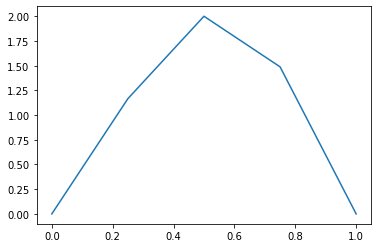

In [11]:
# def tpcp(rho_cd, x):
#     U_DE = get_unitary(x[0:16], n=4)
#     U_DE = Qobj(U_DE, dims=[[2,2],[2,2]])
#     U_CDE = tensor(identity(2), U_DE)
#     
#     # rho_E0 = get_dm(z_arr=[[],[x[16]],[x[17],x[18]]], eig_vals=(x[19],x[20]), n=2)
#     rho_E0 = get_qubit_dm(*x[16:19])
#     rho_cde = tensor(rho_cd, rho_E0)
#     
#     rho_cde = U_CDE * rho_cde * U_CDE.dag()
#     rho_cd = rho_cde.ptrace([0,1])
#     
#     return rho_cd

def tpcp(rho_cd, x):
    U_EC = get_unitary(x[0:16], n=4)
    U_EC = Qobj(U_EC, dims=[[2,2],[2,2]])
    U_ECD = tensor(U_EC, identity(2))
    
    # rho_E0 = get_dm(z_arr=[[],[x[16]],[x[17],x[18]]], eig_vals=(x[19],x[20]), n=2)
    rho_E0 = get_qubit_dm(*x[16:19])
    rho_ecd = tensor(rho_E0, rho_cd)
    
    rho_ecd = U_ECD * rho_ecd * U_ECD.dag()
    rho_cd = rho_ecd.ptrace([1, 2])
    
    return rho_cd

def mutual_information(rho):
    return entropy_mutual(rho, 0, 1, base=2)

def mutual_inf_c(x, t):
    psi_0 = tensor(basis(2, 0), basis(2, 0))  # |0>x|0>
    rho_ab = ket2dm(psi_0)
    U_t = U(t)
    
    rho_cd = U_t.dag() * rho_ab * U_t
    rho_cd = tpcp(rho_cd, x)
    rho_ab = U_t * rho_cd * U_t.dag()
    
    return entropy_mutual(rho_ab, 0, 1, base=2)


bounds = [(None, None)]*19
bounds[16] = (0, 1)
bounds[17] = (0, pi)
bounds[18] = (0, 2*pi)

def max_mutual_c(t):
    f = lambda x, t: -mutual_inf_c(x, t)
    return -scipy.optimize.minimize(f, np.ones(19), args=t, bounds=bounds).fun

# Plot
t_arr = np.linspace(0, 1, 5)
I_max_stine= np.zeros_like(t_arr)
for i, t in enumerate(t_arr):
    I_max_stine[i] = max_mutual_c(t)

plt.plot(t_arr, I_max_stine)